# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 7, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Marcel van de Lagemaat - 10886699 <br>
Anton Andersen - 14718758 

Run the following cell to import the necessary packages.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy in single-precision floating point numbers
Working with real numbers on a computer can sometimes be counter-intuitive. Not every real number cannot be represented exactly, because that would require an infinite amount of memory. Real numbers are in Python represented as "double-precision floating point numbers" that approximate the real numbers they represent. As such, the usual "rules of mathematics" no longer hold for very small or very large numbers:

In [24]:
print("very small numbers:")
print(1 - 1)          # Should be zero
print(1 - 1 + 1e-17)  # Should be 10 ** -17, i.e. a very small number
print(1 + 1e-17 - 1)  # Should *also* be 10**-17, but is it?

print("very large numbers:")
print(2.0**53)        # Some very large number
print(2.0**53 + 1.0)  # Some very large number + 1

very small numbers:
0
1e-17
0.0
very large numbers:
9007199254740992.0
9007199254740992.0


Usually, you don't have to worry about these rounding errors. But in scientific computing, these rounding errors sometimes become important. To reveal this problem more directly, we can decrease the precision of these approximations, using "single precision" instead of double precision floating point numbers, by employing `np.single`:

In [25]:
print(1.0 + 10**-9)             # Should be slightly above 1
print(np.single(1.0 + 10**-9))  # But in single precision, it is exactly 1.

1.000000001
1.0


Today we will practice with these single-precision floating point numbers. One thing to keep in mind is that Python will *really* try to work with double-precision floats:

In [26]:
a = 5.0
b = np.single(5.0)
print("a and b represent the same value:", a == b)
print("but they are of different types:", type(a), type(b))
print("If I add zero to a, its type does not change: ", type(a) == type(a + 0.0))
print("If I add zero to b, its type *does* change:   ", type(b) == type(b + 0.0))

a and b represent the same value: True
but they are of different types: <class 'float'> <class 'numpy.float32'>
If I add zero to a, its type does not change:  True
If I add zero to b, its type *does* change:    False


Any time Python encounters a number like `1` or `0` or `math.pi`, it will interpret this as double precision, unless you use `np.single`. 

So we have to be extra careful when working with these single-precision numbers, to prevent these types changing. See the difference between `S` and `T` below.

In [27]:
S = 0.0
S += np.single(5.0)
print(type(S))

T = np.single(0.0)
T += np.single(5.0)
print(type(T))

<class 'numpy.float64'>
<class 'numpy.float32'>


## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


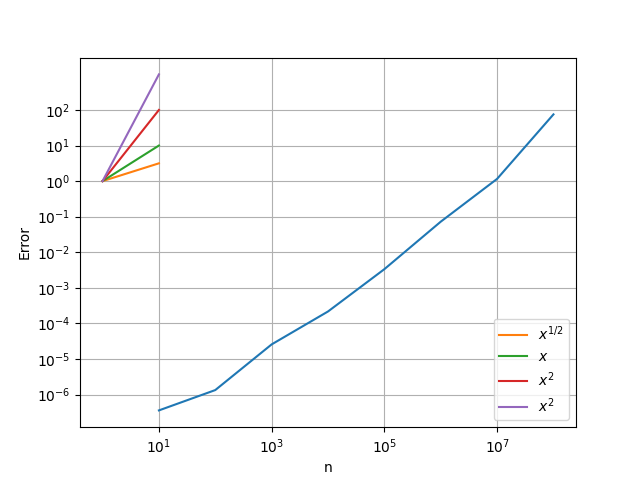

In [28]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

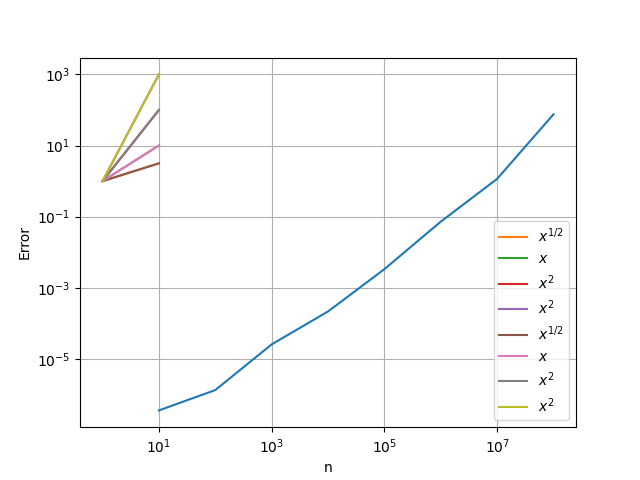

In [29]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


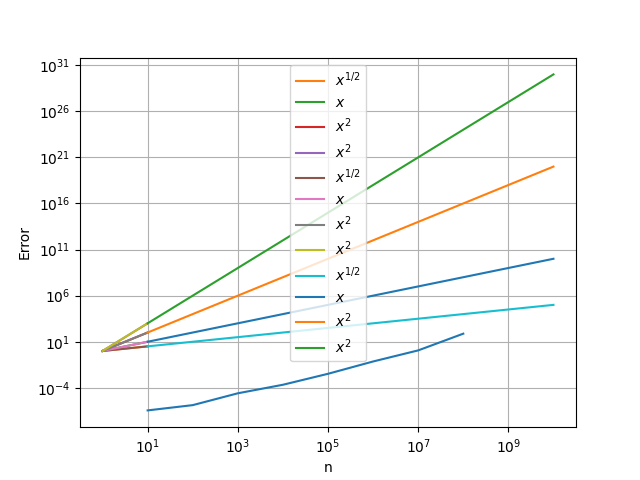

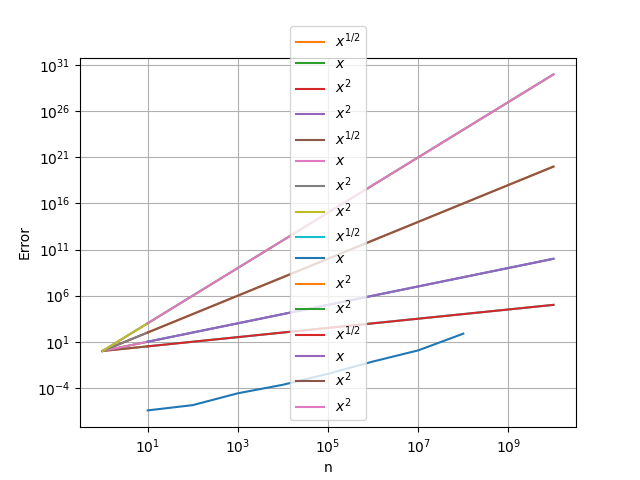

In [30]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

-----
# Exercise 1
This exercise is a variant of exercise 1.6 in the book.

## (a) 
Lookup the Taylor series for $\cos(x)$ in the base point $0$. (You don't have to hand in the series expansion)

$\cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!} ...$
## (b) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **two** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

In [31]:
def cos_approx_2(x):
    cos_approx = 1 - (x**2 / np.math.factorial(2))
    forward_error = cos_approx - np.cos(x)
    backward_error = np.arccos(cos_approx) - x
    return forward_error, backward_error

print(f'The approximation of 0.2 backward error is: {cos_approx_2(0.2)[1]} and forward error is: {cos_approx_2(0.2)[0]}')
print(f'The approximation of 1 backward error is: {cos_approx_2(1)[1]} and forward error is: {cos_approx_2(1)[0]}')
print(f'The approximation of 2 backward error is: {cos_approx_2(2)[1]} and forward error is: {cos_approx_2(2)[0]}')

The approximation of 0.2 backward error is: 0.00033484232311967177 and forward error is: -6.657784124164401e-05
The approximation of 1 backward error is: 0.04719755119659785 and forward error is: -0.040302305868139765
The approximation of 2 backward error is: 1.1415926535897931 and forward error is: -0.5838531634528576


The approximation error using the first two nonzero terms for $x=0.2$ is backward error $= 0.0003$ and forward error $= -0.000068$. For $x = 1$, the backward error $= 0.0472$ and forward error $= -0.0403$. For $x = 2$, the backward error $= 1.1416$ and forward error $= -0.5838$.

## (c) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **three** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

In [32]:
def cos_approx_3(x):
    cos_approx = 1 - (x**2 / np.math.factorial(2)) + (x**4 / np.math.factorial(4))
    forward_error = cos_approx - np.cos(x)
    backward_error = np.arccos(cos_approx) - x
    return forward_error, backward_error

print(f'The approximation of 0.2 backward error is: {cos_approx_3(0.2)[1]} and forward error is: {cos_approx_3(0.2)[0]}')
print(f'The approximation of 1 backward error is: {cos_approx_3(1)[1]} and forward error is: {cos_approx_3(1)[0]}')
print(f'The approximation of 2 backward error is: {cos_approx_3(2)[1]} and forward error is: {cos_approx_3(2)[0]}')

The approximation of 0.2 backward error is: -4.4710234142764094e-07 and forward error is: 8.882542501531532e-08
The approximation of 1 backward error is: -0.0016222452979235413 and forward error is: 0.0013643607985268646
The approximation of 2 backward error is: -0.0893667637509814 and forward error is: 0.08281350321380904


The approximation error using the first two nonzero terms for $x=0.2$ approaches zero for both types of approximation error, the values can be seen in the box above. For $x = 1$, the backward error $= -0.0016$ and forward error $= 0.0014$. For $x = 2$, the backward error $= -0.0894$ and forward error $= 0.0828$.

## (d) (1 pt)
Compute the relative condition of $x \mapsto \cos(x)$ at $x = 0.2$, $x=1.0$ and $x=2.0$.

In [33]:
def relative_condition(x):
    return (-np.sin(x)*x) / np.cos(x)

print(f'Relative condition of 0.2 is {abs(relative_condition(0.2))}')
print(f'Relative condition of 1 is {abs(relative_condition(1))}')
print(f'Relative condition of 2 is {abs(relative_condition(2))}')

Relative condition of 0.2 is 0.0405420071017345
Relative condition of 1 is 1.557407724654902
Relative condition of 2 is 4.370079726523038


The relative condition can be calculated as $cond = \frac{x \cdot f(x)'}{f(x)}$. The equation to evalaute is then $\frac{x \cdot - \sin(x)}{\cos(x)}$. The relative condition of $x = 0.2$ is 0.0405, for $x = 1$ the relative condition is 1.5574 and for $x = 2$ it is 4.3701.

# Exercise 2

This exercise is about computing the sum of a set of $n$ random numbers. You are asked to implement different ways to compute the sum. To be able to compare rounding errors for the different methods, all sums have to be executed in single precision (some hints are above), and implemented by yourself, unless specifically mentioned. The result of each sum can then be compared with a reference implementation that employs the standard double precision format.

Vary $n$ by choosing different powers of 10 at least up to, say, $10^7$.

## (a)
Create a function that returns an array of $n$ single precision random numbers (here denoted by $x_1$, $i=1, \ldots, n$), uniformly distributed in the interval $[0,1]$. You may use a suitable function from `numpy.random`.

Create a function to sum the numbers using double precision computations in the order they are generated. 

In [34]:
import numpy as np

def random_array(n, seed=0):
    # rng = np.random.default_rng(seed)
    return np.single(np.random.uniform(size=n))

def sum_double(a):
    return np.sum(a, dtype=np.float64)

## (b) (a+b together 2 pts)
Create a function to sum the numbers in the order in which they were generated, this time using single-precision computations. Visualize the errors as a function of $n$ using a log-log plot.

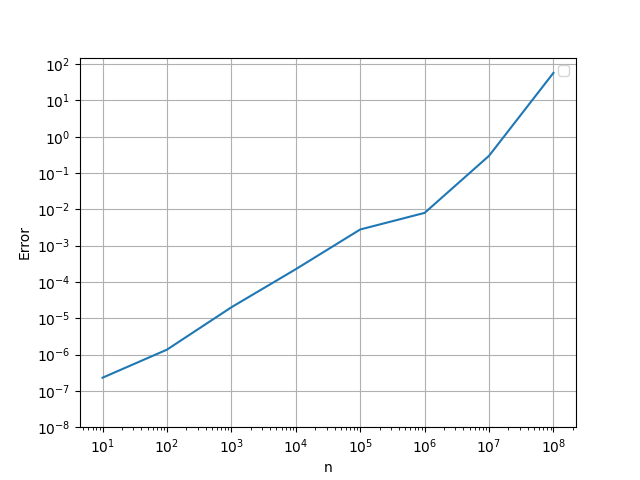

In [35]:
def sum_single(a):
    return np.sum(a, dtype=np.float32)

import matplotlib.pyplot as plt

def plot(N, errors, legend=[]):
    fig, ax = plt.subplots()
    linestyle = ['-', '--', ':', '-.']
    for i in range(len(errors)):
        plt.loglog(N, errors[i], linestyle[i])
    
    ax.grid()
    plt.yticks([10.0 ** i for i in np.arange(-8, 3, 1)])
    plt.xlabel('n')
    plt.ylabel('Error')
    plt.legend(legend)
    plt.show()

N = np.logspace(1, 8, 8, base = 10)
a_list = np.array([random_array(int(n)) for n in N], dtype='object')
errors = [np.abs(sum_double(a) - sum_single(a)) for a in a_list]
plot(N, [errors])

## (c) (1.5 pts)
Use the following compensated summation algorithm (due to Kahan), again using only single precision, to sum the numbers in the order in which they were generated:

<img src="Kahan_alg.png"
     width=200>
 
(algorithm at https://canvas.uva.nl/files/7499123/download?download_frd=1)

Plot the error as a function of $n$.

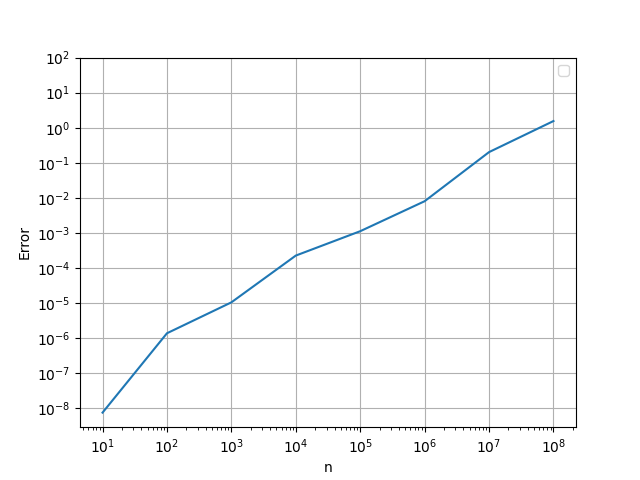

In [41]:
def sum_kahan(a):
    s = a[0]
    c = np.single(0)
    for i in range(1, len(a)):
        y = a[i] - c
        t = s + y
        c = (t - s) - y
        s = t
    return s

errors_kahan = [np.abs(sum_double(a) - sum_kahan(a)) for a in a_list]

plot(N, [errors_kahan])

## (d) (1.5 pts)
Sum the numbers in increasing order of magnitude and plot the error. Sum the numbers in decreasing order of magnitude and plot the error. You may use a `sort` function from NumPy or some other package. (You don't need to use the Kahan sums here.)

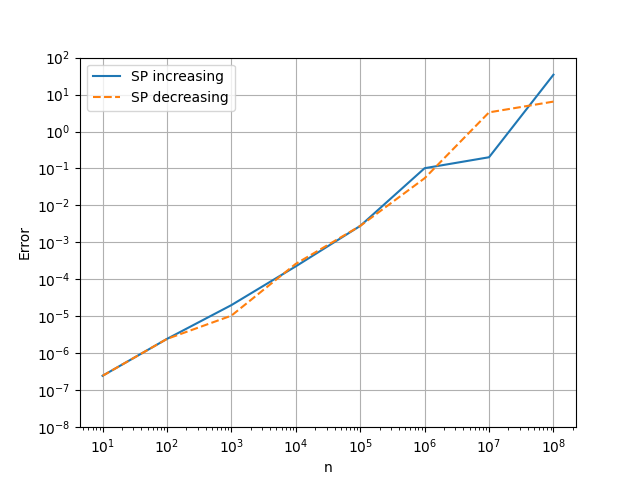

In [37]:
def sum_inc(a):
    return np.sum(np.sort(a), dtype=np.float32)

def sum_dec(a):
    return np.sum(np.sort(a)[::-1], dtype=np.float32)

errors_inc = [np.abs(sum_double(a) - sum_inc(a)) for a in a_list]
errors_dec = [np.abs(sum_double(a) - sum_dec(a)) for a in a_list]

plot(N, [errors_inc, errors_dec], legend=['SP increasing', 'SP decreasing'])

## (e) (2 pts)
How do the methods rank in terms of accuracy? Can you explain the differences? Can you explain why the method of Kahan works? 
N.B.1 be precise in your explanations. Try to explain the size of any errors that are not incurred as well as of errors that are encurred.
N.B.2 you are required to formulate an answer in text. You may also add computations if you feel this helps in the explanations.

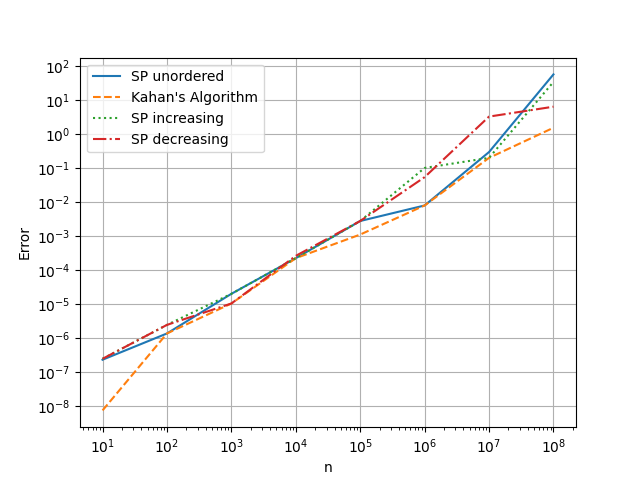

In [38]:
plot(N, [errors, errors_kahan, errors_inc, errors_dec], legend=['SP unordered', 'Kahan\'s Algorithm', 'SP increasing', 'SP decreasing'])

In the figure above we plotted all errors of the different functions. The accuracy of the methods very largely depends on the random numbers that have been generated. This can be seen in the variation of the errors for different random arrays. <br>
We can see an positive trend in the graph, meaning that in a small array the errors are small and increase with the size of the array. This is caused by less rounding errors happening when the array is smaller. Because of this, all methods perform very similarly for smaller arrays and it is only when arrays get larger that Kahan's algorithm is performing better than the others. <br>
The reason that Kahan works is that every iteration you subtract a value c from the next number in the array before adding it to the total sum. This value c is, according to the algorithm is theoretically:
$$ c = (t - sum) - y $$ 
The definition of t is:
$$ t = sum + y $$
If we substitute this in c we get:
$$ c = (sum + y - sum) - y = 0 $$
ue to rounding in these equations however, c is actually not exactly zero. It is the number that is lost due to rounding in the previous iteration. Kahan's algorithm therefore compensates for the lost accuracy and performs better. This can also be seen in the appendix. 

# Appendix
Below we calculated the average of the errors over 10 runs with different random arrays. Here you can see more clearly Kahan algorithm outperforming the other methods

In [42]:
errors = np.zeros(len(N))
errors_kahan = np.zeros(len(N))
errors_inc = np.zeros(len(N))
errors_dec = np.zeros(len(N))

for i in range(10):
    a_list = np.array([random_array(int(n)) for n in N], dtype='object')
    errors += [np.abs(sum_double(a) - sum_single(a)) for a in a_list]
    print(f"Iteration {i} SP done")
    errors_kahan += [np.abs(sum_double(a) - sum_kahan(a)) for a in a_list]
    print(f"Iteration {i} Kahan done")
    errors_inc += [np.abs(sum_double(a) - sum_inc(a)) for a in a_list]
    print(f"Iteration {i} SP increasing done")
    errors_dec += [np.abs(sum_double(a) - sum_dec(a)) for a in a_list]
    print(f"Iteration {i} SP decreasing done")

avg_errors = errors / len(N)
avg_errors_kahan = errors_kahan / len(N)
avg_errors_inc = errors_inc / len(N)
avg_errors_dec = errors_dec / len(N)

Iteration 0 SP done
Iteration 0 Kahan done
Iteration 0 SP increasing done
Iteration 0 SP decreasing done
Iteration 1 SP done
Iteration 1 Kahan done
Iteration 1 SP increasing done
Iteration 1 SP decreasing done
Iteration 2 SP done
Iteration 2 Kahan done
Iteration 2 SP increasing done
Iteration 2 SP decreasing done
Iteration 3 SP done
Iteration 3 Kahan done
Iteration 3 SP increasing done
Iteration 3 SP decreasing done
Iteration 4 SP done
Iteration 4 Kahan done
Iteration 4 SP increasing done
Iteration 4 SP decreasing done
Iteration 5 SP done
Iteration 5 Kahan done
Iteration 5 SP increasing done
Iteration 5 SP decreasing done
Iteration 6 SP done
Iteration 6 Kahan done
Iteration 6 SP increasing done
Iteration 6 SP decreasing done
Iteration 7 SP done
Iteration 7 Kahan done
Iteration 7 SP increasing done
Iteration 7 SP decreasing done
Iteration 8 SP done
Iteration 8 Kahan done
Iteration 8 SP increasing done
Iteration 8 SP decreasing done
Iteration 9 SP done
Iteration 9 Kahan done
Iteration 9 

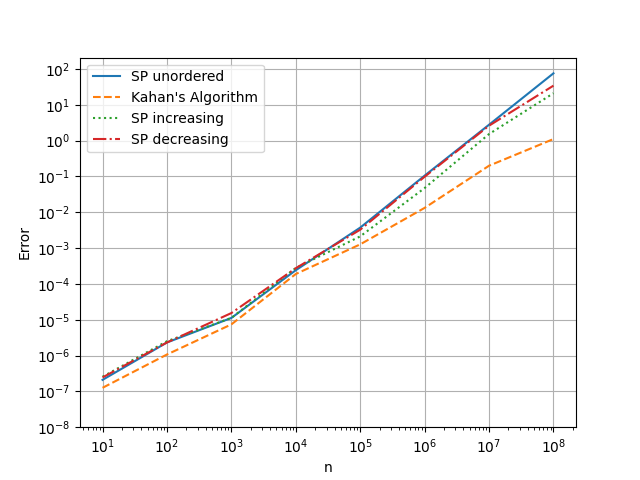

In [43]:
plot(N, [avg_errors, avg_errors_kahan, avg_errors_inc, avg_errors_dec], legend=['SP unordered', 'Kahan\'s Algorithm', 'SP increasing', 'SP decreasing'])